# Bayesian Inference

We are trying to infer the true popluation parameter (after assuming a distribution)

Posterior = Likelihood * Prior / Evidence

# Bayesian Feminist

My friend believes that women are bad employees.

To quantify this belief, I first asked him to define a good employee. We came to a conclusion that a good employee is someone who does a task in 5 hours on average. We assumed a standard deviation of 1 hour. So, as per statistics language,  we assumed that good employee comes from a Normal Distribution of mean=5 hours, SD=1hour

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt
#good_employees = norm.rvs(loc=5,scale=1,size=10000)

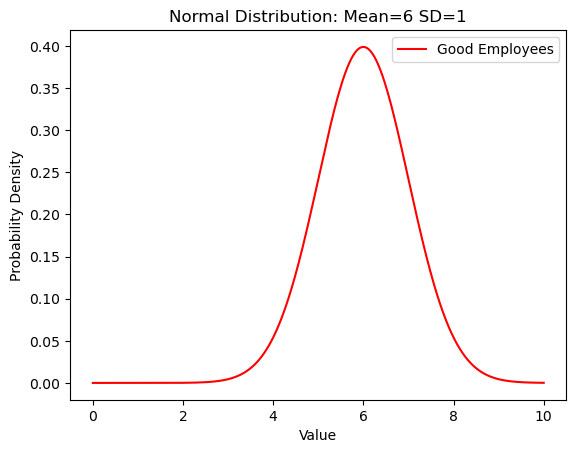

In [95]:
import numpy as np
x = np.linspace(0, 10, 1000)
pdf = (1/(1*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - 6)/1)**2)  # PDF formula for normal distribution with mean=6 and sd=1
plt.plot(x, pdf, color='r', label='Good Employees')
# Add labels and legend
plt.title('Normal Distribution: Mean=6 SD=1')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Now my friend obviously doesn't think that women employees come from this distribution. He believes they come from another distribution. His PRIOR belief is that women on average take 7 hours to complete a task, with the same standard deviation of 1 hour.

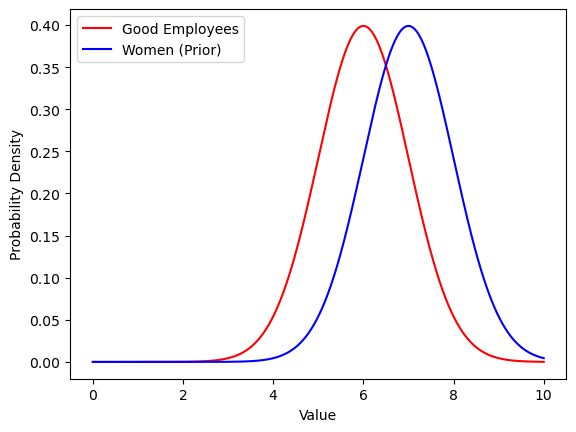

In [96]:
x = np.linspace(0, 10, 1000)
pdf = (1/(1*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - 6)/1)**2)  # PDF formula for normal distribution with mean=5 and sd=1
pdf2 = (1/(1*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - 7)/1)**2)  # PDF formula for normal distribution with mean=7 and sd=1

ax = plt.plot(x, pdf, color='r', label='Good Employees')
plt.plot(x, pdf2, color='b', label='Women (Prior)')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [67]:
def likelihood_normal(data, mu, sigma):
    """
    Calculate the likelihood function for observing a data point x
    given a normal distribution with mean mu and standard deviation sigma.
    """
    likelihood = 1.0
    for x in data:
        likelihood *= 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*((x - mu)/sigma)**2)
    return likelihood

In [87]:
x = np.linspace(0, 10, 1000)

prior = (1/(1*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - 7)/1)**2)  # PDF formula for normal distribution with mean=7 and sd=1
likelihoods = np.array([likelihood_normal([4,7,6],mu,1) for mu in x])

In [88]:
unnormalized_posterior = likelihoods*prior

In [89]:
import scipy as sp
evidence = sp.integrate.trapz(unnormalized_posterior, x) #Evidence

In [90]:
normalized_posterior = unnormalized_posterior/(evidence)

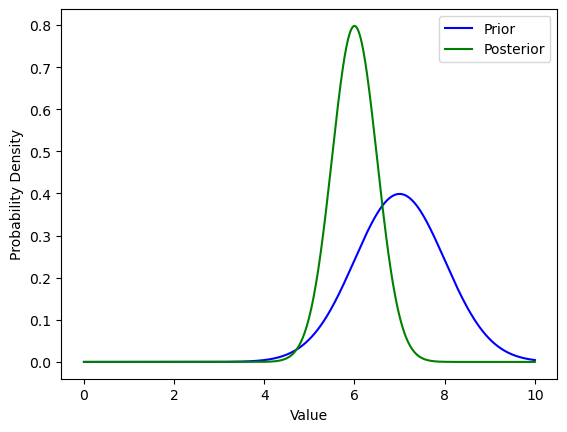

In [91]:
ax = plt.plot(x, prior, color='b', label='Prior')
plt.plot(x, normalized_posterior, color='g', label='Posterior')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [92]:
def compute_percentile(parameter_values, distribution_values, percentile):
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return parameter_values[percentile_index]

In [93]:
compute_percentile(x, normalized_posterior, 0.5)

5.995995995995996

# [Drug Testing problem](https://github.com/fonnesbeck/Bayes_Computing_Course/blob/master/notebooks/Section1_1-Basic_Bayes.ipynb)

We have to find out if the drug helps in increasing IQ, using Bayesian Inference.

In [2]:
import pandas as pd

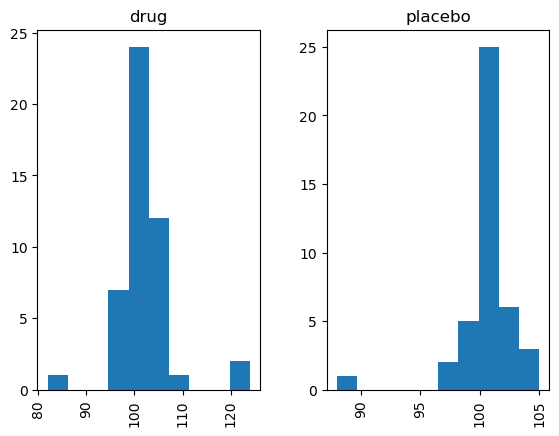

In [5]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group');

In [9]:
trial_data[trial_data.group=='drug']['iq'].mean()

101.91489361702128

In [10]:
trial_data[trial_data.group=='placebo']['iq'].mean()

100.35714285714286

In [ ]:
#Step -1  -- Assume data generation process
## Given the outliers, we assume that the data generation process is T-distribution.
### T-distirbution has 3 parameters -- mean, sd and dof.

In [ ]:
!pip uninstall pymc3

In [10]:
# Step-2 -- Assume priors of parameters.
## We are assuming that both placebo and drug distirbutions have same sd and dof. We are only concerned about means.
## Prior Means of both drug and placebo are assumed to be coming from a normal distribution of mean=100, sd =10
from pymc3 import Model



AttributeError: partially initialized module 'theano' has no attribute 'compile' (most likely due to a circular import)

# [TDS Blog - Find Posterior ](https://towardsdatascience.com/how-to-use-bayesian-inference-for-predictions-in-python-4de5d0bc84f3)
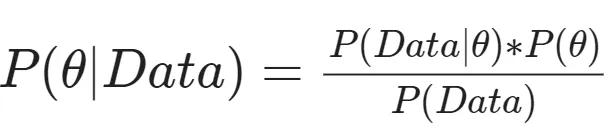

In [55]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [45]:
mu = np.linspace(1.65, 1.8, num = 50)

In [51]:
#Prior f(mu) = 1
uniform_dist = sts.uniform.pdf(mu) + 1

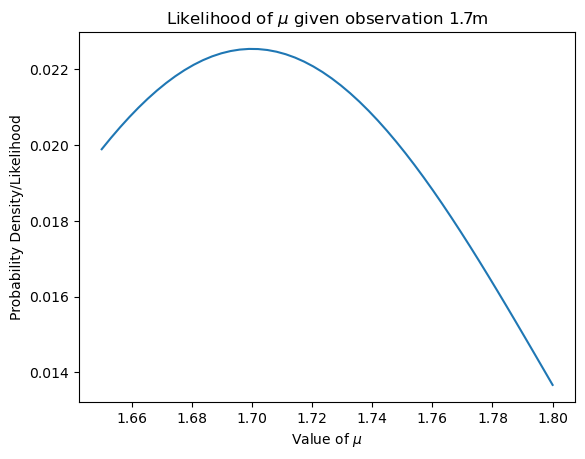

In [47]:
#Likelihood Function
def likelihood_func(datum, mu):
  likelihood_out = sts.norm.pdf(datum, mu, scale = 0.1) #Note that mu here is an array of values, so the output is also an array!
  return likelihood_out/likelihood_out.sum()

likelihood_out = likelihood_func(1.7, mu)

plt.plot(mu, likelihood_out)
plt.title("Likelihood of $\mu$ given observation 1.7m")
plt.ylabel("Probability Density/Likelihood")
plt.xlabel("Value of $\mu$")
plt.show()

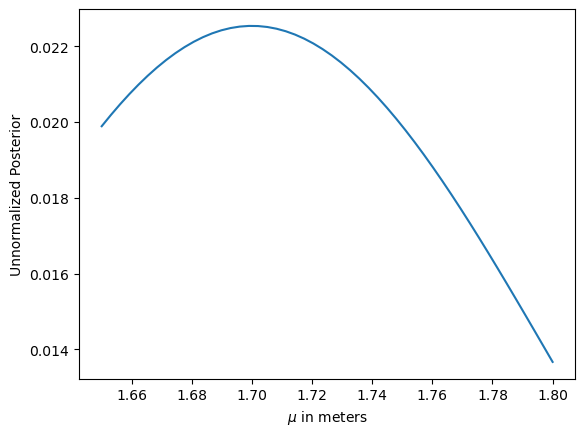

In [53]:
# Posterior
unnormalized_posterior = likelihood_out * uniform_dist
plt.plot(mu, unnormalized_posterior)
plt.xlabel("$\mu$ in meters")
plt.ylabel("Unnormalized Posterior")
plt.show()

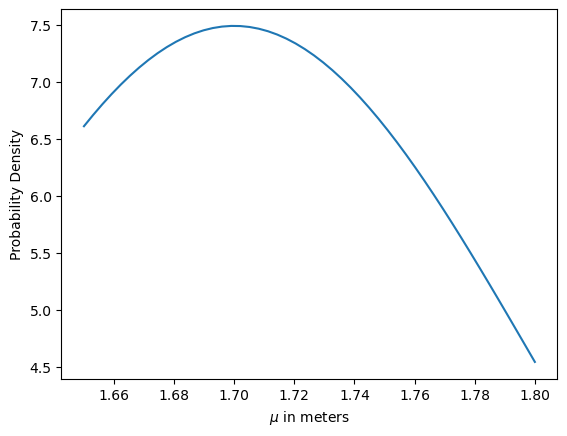

In [56]:
# Posterior
p_data = sp.integrate.trapz(unnormalized_posterior, mu) #Evidence
normalized_posterior = unnormalized_posterior/(p_data)
plt.plot(mu, normalized_posterior)
plt.xlabel("$\mu$ in meters")
plt.ylabel("Probability Density")
plt.show()


In [59]:
sp.integrate.trapz(normalized_posterior, mu)

1.0

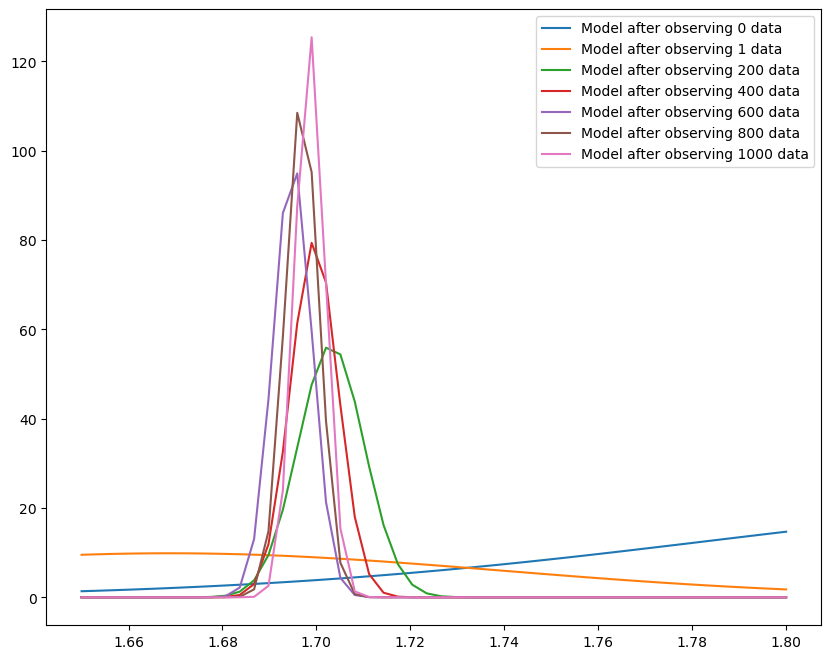

In [64]:
heights_data = sts.norm.rvs(loc = 1.7, scale = 0.1, size = 1001) #Sample data

prior = uniform_dist
posterior_dict = {}

plt.figure(figsize = (10, 8))

for ind, datum in enumerate(heights_data):
  likelihood = likelihood_func(datum, mu)
  unnormalized_posterior = prior * likelihood
  normalized_posterior = unnormalized_posterior/sp.integrate.trapz(unnormalized_posterior, mu)
  prior = normalized_posterior
  posterior_dict[ind] = normalized_posterior
  if (ind==1) | (ind%200 == 0):
    plt.plot(mu, normalized_posterior, label = f'Model after observing {ind} data')

plt.legend()
plt.show()

In [66]:
def compute_percentile(parameter_values, distribution_values, percentile):
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return parameter_values[percentile_index]

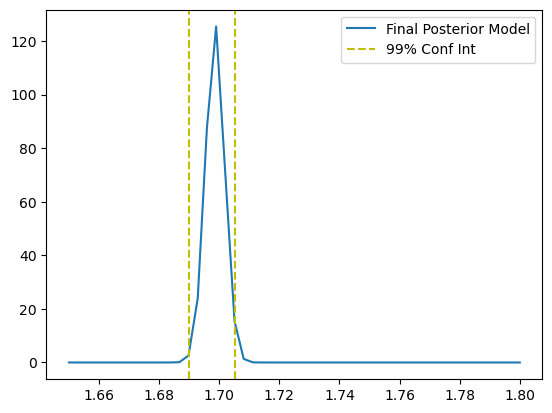

In [68]:
plt.plot(mu, posterior_dict[1000], label = 'Final Posterior Model')
plt.axvline(x = compute_percentile(mu, posterior_dict[1000], 0.005), ls = '--', color = 'y', label = '99% Conf Int')
plt.axvline(x = compute_percentile(mu, posterior_dict[1000], 0.995), ls = '--', color = 'y')
plt.legend()
plt.show()

In [69]:
compute_percentile(mu, posterior_dict[1000], 0.5)

1.6959183673469387

# 11.2 Larry

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import scipy.integrate 
import scipy.interpolate 

# (a) Simulate a data set (using µ = 5, sig=1) consisting of n=100 observations
mu = 5
n = 100
sig = 1
X = norm.rvs(loc=mu,scale=sig,size=n)

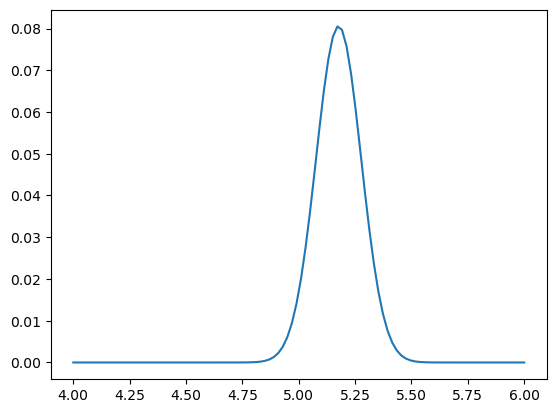

In [33]:
# (b) Take f(µ) = 1 (PRIOR) and find the posterior density. Plot the density
# Brute-force solution: explicitly compute the PDF for each sample, and multiply everything 
# (or take logs, add, and exponentiate):
mu_hat = X.mean()
mu_values = np.linspace(4, 6, 100)
likelihood = np.vectorize(lambda mu_hat: np.exp(np.log(norm.pdf(X, loc=mu_hat, scale=sig)).sum()))
L_i = likelihood(mu_values)
plt.plot(mu_values, L_i / L_i.sum())
plt.show()

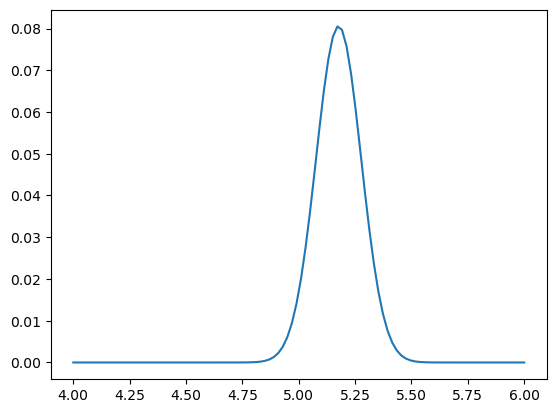

In [35]:
# Alternatively, use the analytic solution, \mathcal{L}_n(\mu) \sim N(\mu_hat, \sigma^2/n)

L_i2 = norm.pdf(mu_values, loc=mu_hat, scale=sig/np.sqrt(n))
plt.plot(mu_values, L_i2 / L_i2.sum());

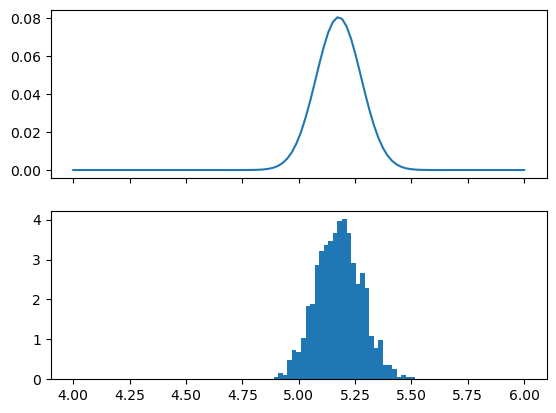

In [38]:
# (c) Simulate 1,000 draws from the posterior. Plot a histogram of the simulated values and compare the histogram to the answer in (b).
fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col')
ax1.plot(mu_values, L_i2 / L_i2.sum())

posterior_samples = norm.rvs(loc=mu_hat, scale=sig/np.sqrt(n), size=1000)
ax2.hist(posterior_samples, density=True, bins=mu_values);


In [42]:
# (e) Find a 95 percent posterior interval for µ
posterior_interval_simulation = (
    np.quantile(Y, 0.025),
    np.quantile(Y, 0.975)
)

print("95%% posterior interval (simulation):  %.3f, %.3f" % posterior_interval_simulation)

NameError: name 'Y' is not defined


# References:
1. [SciPy Chris Fonnesbeck](https://www.youtube.com/watch?v=vOBB_ycQ0RA&list=PLUFvcK55ts6V2K5vMx-eSjXMUhm-Ys2Zd)
